In [58]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
from textblob import TextBlob
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/angela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/angela/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_csv('technical_challenge_v1.csv', sep =',')
data

,File,Case,Case_Text,row
0,06_1130.xml,Tapgnuk v Northern Land Council (1996) 5 NTLR 109,"Before the Deed of Grant was made, the Kamu ma...",2
1,07_975.xml,Armorduct Manufacturing Company Ltd v General ...,26 Section 468 of the Act provides that any di...,3
2,06_1630.xml,Silbermann v CGU Insurance Ltd (2003) 47 ACSR 21,"6 On 27 August 2003, CGU sought orders in the ...",4
3,08_1893.xml,Minister for Immigration and Multicultural Aff...,"21 Thirdly, the appellant complained that the ...",5
4,06_1535.xml,"SZCVC v Minister for Immigration, Multicultura...",NaN,6
...,...,...,...,...
1895,06_587.xml,Craine v Colonial and Mutual Life Fire Insuran...,39 As Isaacs J observed giving the judgment of...,1897
1896,06_903.xml,"Amodu Tijani v The Secretary, Southern Nigeria...","612 In Amodu Tijani v The Secretary, Southern ...",1898
1897,07_1091.xml,Commissioner for Australian Capital Territory ...,16 In SZBEL v Minister for Immigration and Mul...,1899
1898,06_1308.xml,Australian Securities and Investments Commissi...,51 Both McHugh J and Finkelstein J recognised ...,1900


# 1. Remove movie reviews from the original data set

### Movie reviews whose file name start with m/

In [3]:
movie_review = data.loc[data['File'].str.startswith('m/')]
movie_review 

,File,Case,Case_Text,row
10,m/1922_2017,[1922],Subtlety has never been one of Gibson's streng...,12
49,m/1917_2019,-1917,"It may be a grandiose flourish, but you can't ...",51
107,m/horror_2015,#Horror,With Andrew Garfield in the lead role and Mel ...,109
119,m/1985_2018,-1985,The Coens revel in both the glamour and the sq...,121
135,m/hail_caesar_2016,"Hail, Caesar!",The combination of the Coen brothers' filmmaki...,137
...,...,...,...,...
1806,m/rec_4_apocalypse,[REC] 4: Apocalypse,Aster has crafted a story with one foot in the...,1808
1808,m/1917_2019,-1917,[A] terrifying thriller that pins you to the b...,1810
1821,m/1917_2019,[1917],"Having announced itself, it works as a bravura...",1823
1865,m/1917_2019,-1917,"With nary a jump scare in sight, Aster has cre...",1867


In [4]:
data_new = data
data_new = data[~data.File.str.startswith('m/')]
data_new

,File,Case,Case_Text,row
0,06_1130.xml,Tapgnuk v Northern Land Council (1996) 5 NTLR 109,"Before the Deed of Grant was made, the Kamu ma...",2
1,07_975.xml,Armorduct Manufacturing Company Ltd v General ...,26 Section 468 of the Act provides that any di...,3
2,06_1630.xml,Silbermann v CGU Insurance Ltd (2003) 47 ACSR 21,"6 On 27 August 2003, CGU sought orders in the ...",4
3,08_1893.xml,Minister for Immigration and Multicultural Aff...,"21 Thirdly, the appellant complained that the ...",5
4,06_1535.xml,"SZCVC v Minister for Immigration, Multicultura...",NaN,6
...,...,...,...,...
1895,06_587.xml,Craine v Colonial and Mutual Life Fire Insuran...,39 As Isaacs J observed giving the judgment of...,1897
1896,06_903.xml,"Amodu Tijani v The Secretary, Southern Nigeria...","612 In Amodu Tijani v The Secretary, Southern ...",1898
1897,07_1091.xml,Commissioner for Australian Capital Territory ...,16 In SZBEL v Minister for Immigration and Mul...,1899
1898,06_1308.xml,Australian Securities and Investments Commissi...,51 Both McHugh J and Finkelstein J recognised ...,1900


### Other movie reviews

In [5]:
nameLst = []
for i in data_new['Case']:
    if not any(char.isdigit() for char in i):
        print(i)
        nameLst.append(i)

Star Wars: Episode VII - The Force Awakens
A Dog's Purpose
A Nightmare on Elm Street
A Quiet Place
Ad Astra
Airplane!
A Star Is Born
Alien: Covenant
Aladdin
A Wrinkle in Time


In [6]:
movie_review2 = data_new.loc[data_new['Case'].isin(nameLst)]
movie_review2

,File,Case,Case_Text,row
487,06_1670.xml,Star Wars: Episode VII - The Force Awakens,A triumphant return to form for the franchise ...,489
515,06_1696.xml,A Dog's Purpose,The film is both heartwarming and soul-shatter...,517
975,06_1024.xml,A Nightmare on Elm Street,"The script is consistently witty, the camera w...",977
1067,06_1023.xml,A Quiet Place,[Noah] Jupe is poignantly convincing - a perpe...,1069
1120,06_1020.xml,Ad Astra,To lavish too much praise on Mr. Pitt's perfor...,1122
1300,06_1697.xml,Airplane!,The combination of the Coen brothers' filmmaki...,1302
1310,06_1022.xml,A Star Is Born,Pop diva Lady Gaga gives a perfectly creditabl...,1312
1468,06_1699.xml,Alien: Covenant,Though the scale is large and the action takes...,1470
1668,06_1698.xml,Aladdin,Pop diva Lady Gaga gives a perfectly creditabl...,1670
1754,06_1021.xml,A Wrinkle in Time,I was transported by DuVernay's adaptation to ...,1756


In [7]:
anothermovie = data_new.loc[data_new['Case'] == '-1917']
movie_review2 = movie_review2.append(anothermovie)
movie_review2

,File,Case,Case_Text,row
487,06_1670.xml,Star Wars: Episode VII - The Force Awakens,A triumphant return to form for the franchise ...,489
515,06_1696.xml,A Dog's Purpose,The film is both heartwarming and soul-shatter...,517
975,06_1024.xml,A Nightmare on Elm Street,"The script is consistently witty, the camera w...",977
1067,06_1023.xml,A Quiet Place,[Noah] Jupe is poignantly convincing - a perpe...,1069
1120,06_1020.xml,Ad Astra,To lavish too much praise on Mr. Pitt's perfor...,1122
1300,06_1697.xml,Airplane!,The combination of the Coen brothers' filmmaki...,1302
1310,06_1022.xml,A Star Is Born,Pop diva Lady Gaga gives a perfectly creditabl...,1312
1468,06_1699.xml,Alien: Covenant,Though the scale is large and the action takes...,1470
1668,06_1698.xml,Aladdin,Pop diva Lady Gaga gives a perfectly creditabl...,1670
1754,06_1021.xml,A Wrinkle in Time,I was transported by DuVernay's adaptation to ...,1756


In [8]:
# remove data frame movie2 
df_cleaned = pd.concat([data_new, movie_review2, movie_review2]).drop_duplicates(keep=False)
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

,File,Case,Case_Text,row
0,06_1130.xml,Tapgnuk v Northern Land Council (1996) 5 NTLR 109,"Before the Deed of Grant was made, the Kamu ma...",2
1,07_975.xml,Armorduct Manufacturing Company Ltd v General ...,26 Section 468 of the Act provides that any di...,3
2,06_1630.xml,Silbermann v CGU Insurance Ltd (2003) 47 ACSR 21,"6 On 27 August 2003, CGU sought orders in the ...",4
3,08_1893.xml,Minister for Immigration and Multicultural Aff...,"21 Thirdly, the appellant complained that the ...",5
4,06_1535.xml,"SZCVC v Minister for Immigration, Multicultura...",NaN,6
...,...,...,...,...
1803,06_587.xml,Craine v Colonial and Mutual Life Fire Insuran...,39 As Isaacs J observed giving the judgment of...,1897
1804,06_903.xml,"Amodu Tijani v The Secretary, Southern Nigeria...","612 In Amodu Tijani v The Secretary, Southern ...",1898
1805,07_1091.xml,Commissioner for Australian Capital Territory ...,16 In SZBEL v Minister for Immigration and Mul...,1899
1806,06_1308.xml,Australian Securities and Investments Commissi...,51 Both McHugh J and Finkelstein J recognised ...,1900


## Movie data: save them in a spreadsheet titled movies.csv so that the client can still view them to ensure no necessary information was deleted

In [9]:
# 
frames = [movie_review, movie_review2]
df_movie = pd.concat(frames)
df_movie

,File,Case,Case_Text,row
10,m/1922_2017,[1922],Subtlety has never been one of Gibson's streng...,12
49,m/1917_2019,-1917,"It may be a grandiose flourish, but you can't ...",51
107,m/horror_2015,#Horror,With Andrew Garfield in the lead role and Mel ...,109
119,m/1985_2018,-1985,The Coens revel in both the glamour and the sq...,121
135,m/hail_caesar_2016,"Hail, Caesar!",The combination of the Coen brothers' filmmaki...,137
...,...,...,...,...
1310,06_1022.xml,A Star Is Born,Pop diva Lady Gaga gives a perfectly creditabl...,1312
1468,06_1699.xml,Alien: Covenant,Though the scale is large and the action takes...,1470
1668,06_1698.xml,Aladdin,Pop diva Lady Gaga gives a perfectly creditabl...,1670
1754,06_1021.xml,A Wrinkle in Time,I was transported by DuVernay's adaptation to ...,1756


write into csv

# 2. Remove the row column

In [10]:
df = df_cleaned.drop('row', axis=1)
df

,File,Case,Case_Text
0,06_1130.xml,Tapgnuk v Northern Land Council (1996) 5 NTLR 109,"Before the Deed of Grant was made, the Kamu ma..."
1,07_975.xml,Armorduct Manufacturing Company Ltd v General ...,26 Section 468 of the Act provides that any di...
2,06_1630.xml,Silbermann v CGU Insurance Ltd (2003) 47 ACSR 21,"6 On 27 August 2003, CGU sought orders in the ..."
3,08_1893.xml,Minister for Immigration and Multicultural Aff...,"21 Thirdly, the appellant complained that the ..."
4,06_1535.xml,"SZCVC v Minister for Immigration, Multicultura...",NaN
...,...,...,...
1803,06_587.xml,Craine v Colonial and Mutual Life Fire Insuran...,39 As Isaacs J observed giving the judgment of...
1804,06_903.xml,"Amodu Tijani v The Secretary, Southern Nigeria...","612 In Amodu Tijani v The Secretary, Southern ..."
1805,07_1091.xml,Commissioner for Australian Capital Territory ...,16 In SZBEL v Minister for Immigration and Mul...
1806,06_1308.xml,Australian Securities and Investments Commissi...,51 Both McHugh J and Finkelstein J recognised ...


# 3. Create a column named Case_Year. Using the Case column, for each row of data, extract the year of the case, and store it in the newly created column

In [11]:
results = []
for i in df['Case']:
    years = ["".join(j) for j in re.findall(r"\[(\d{4})\]|\((\d{4})\)|\[(\d{4})\)|\/(\d{4})\)",i)]
#    print (years)
    if len(years) >= 1:
        years.sort()
        rslt = int(years[0])
#        print(years, rslt, len(years))
    
    
    ### For Month year, ex: Apr 2008
    else:
        years = re.findall('[abceglnoprtuvyADFJMNOS|]{1}[\s-]\d{4}', i)
        if len(years) > 1:
            rslt = years[-1][-4:]
        elif len(years) == 1:
            for j in years:
                year = "".join(j)
                rslt = year[-4:]
        
        ### For year in range (1966-1968)
        else: 
            years = re.findall('\d{4}[\s-]\d{2,4}|\d{4}', i)
            if len(years)>0:
                for j in years:
                    year = "".join(j)[:4]
                    rslt = int(year)
            else:
                rslt = 'N/A'              
        
    results.append(rslt)

In [12]:
df['Case_Year'] = results
df

,File,Case,Case_Text,Case_Year
0,06_1130.xml,Tapgnuk v Northern Land Council (1996) 5 NTLR 109,"Before the Deed of Grant was made, the Kamu ma...",1996
1,07_975.xml,Armorduct Manufacturing Company Ltd v General ...,26 Section 468 of the Act provides that any di...,1911
2,06_1630.xml,Silbermann v CGU Insurance Ltd (2003) 47 ACSR 21,"6 On 27 August 2003, CGU sought orders in the ...",2003
3,08_1893.xml,Minister for Immigration and Multicultural Aff...,"21 Thirdly, the appellant complained that the ...",2000
4,06_1535.xml,"SZCVC v Minister for Immigration, Multicultura...",NaN,2006
...,...,...,...,...
1803,06_587.xml,Craine v Colonial and Mutual Life Fire Insuran...,39 As Isaacs J observed giving the judgment of...,1920
1804,06_903.xml,"Amodu Tijani v The Secretary, Southern Nigeria...","612 In Amodu Tijani v The Secretary, Southern ...",1921
1805,07_1091.xml,Commissioner for Australian Capital Territory ...,16 In SZBEL v Minister for Immigration and Mul...,1994
1806,06_1308.xml,Australian Securities and Investments Commissi...,51 Both McHugh J and Finkelstein J recognised ...,2006


# 4. Clean up the Case_Text column: 
### a.	Ensure that all paragraphs are separated by only one blank line. 
### b.   Remove any numbers that mark the beginning of a paragraph 

In [13]:
result = []

for text in df['Case_Text']:
    text = str(text)
    list_para = []
    for paragraph in text.split('\n'):
        # remove number 
        for index in range(len(paragraph)):
            if paragraph[index] < '0' or paragraph[index] > '9':
                break
        new_para = paragraph[index:].strip()
        if new_para != '':
            list_para.append(new_para)
    
    new_text = '\n\n'.join(list_para)
    result.append(new_text)


df['Case_Text'] = result

In [14]:
df

,File,Case,Case_Text,Case_Year
0,06_1130.xml,Tapgnuk v Northern Land Council (1996) 5 NTLR 109,"Before the Deed of Grant was made, the Kamu ma...",1996
1,07_975.xml,Armorduct Manufacturing Company Ltd v General ...,Section 468 of the Act provides that any dispo...,1911
2,06_1630.xml,Silbermann v CGU Insurance Ltd (2003) 47 ACSR 21,"On 27 August 2003, CGU sought orders in the Su...",2003
3,08_1893.xml,Minister for Immigration and Multicultural Aff...,"Thirdly, the appellant complained that the Tri...",2000
4,06_1535.xml,"SZCVC v Minister for Immigration, Multicultura...",nan,2006
...,...,...,...,...
1803,06_587.xml,Craine v Colonial and Mutual Life Fire Insuran...,As Isaacs J observed giving the judgment of th...,1920
1804,06_903.xml,"Amodu Tijani v The Secretary, Southern Nigeria...","In Amodu Tijani v The Secretary, Southern Nige...",1921
1805,07_1091.xml,Commissioner for Australian Capital Territory ...,In SZBEL v Minister for Immigration and Multic...,1994
1806,06_1308.xml,Australian Securities and Investments Commissi...,Both McHugh J and Finkelstein J recognised tha...,2006


# 5. Create a column named Case_Reference. For each row of data, extract any sentences where the value of Case occurs in Case_Text. Record these sentences in the newly created column.

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/angela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
length = len(df['Case_Text'])
sen_result = []
all_sen = []

for i in range(length):
    sen_lst = nltk.tokenize.sent_tokenize(df['Case_Text'][i])
    case_name = df['Case'][i]
    for sentence in sen_lst:
        if case_name in sentence:
            sen_result.append(sentence)
    all_sen.append(' '.join(sen_result))
    sen_result = []

df['Case_Reference'] = all_sen

In [17]:
df

,File,Case,Case_Text,Case_Year,Case_Reference
0,06_1130.xml,Tapgnuk v Northern Land Council (1996) 5 NTLR 109,"Before the Deed of Grant was made, the Kamu ma...",1996,They did so because the NLC is required by s 2...
1,07_975.xml,Armorduct Manufacturing Company Ltd v General ...,Section 468 of the Act provides that any dispo...,1911,"It may be that, where a creditor has been prev..."
2,06_1630.xml,Silbermann v CGU Insurance Ltd (2003) 47 ACSR 21,"On 27 August 2003, CGU sought orders in the Su...",2003,That application was dismissed by Bergin J on ...
3,08_1893.xml,Minister for Immigration and Multicultural Aff...,"Thirdly, the appellant complained that the Tri...",2000,"In any event, the argument could not be accept..."
4,06_1535.xml,"SZCVC v Minister for Immigration, Multicultura...",nan,2006,
...,...,...,...,...,...
1803,06_587.xml,Craine v Colonial and Mutual Life Fire Insuran...,As Isaacs J observed giving the judgment of th...,1920,As Isaacs J observed giving the judgment of th...
1804,06_903.xml,"Amodu Tijani v The Secretary, Southern Nigeria...","In Amodu Tijani v The Secretary, Southern Nige...",1921,"In Amodu Tijani v The Secretary, Southern Nige..."
1805,07_1091.xml,Commissioner for Australian Capital Territory ...,In SZBEL v Minister for Immigration and Multic...,1994,In SZBEL v Minister for Immigration and Multic...
1806,06_1308.xml,Australian Securities and Investments Commissi...,Both McHugh J and Finkelstein J recognised tha...,2006,


# 6. Save the final data in a .json file titled final_data.json. Assume that the client may pass this data on to another analyst, therefore readability and structure should be accounted for. Also, save the final data in a spreadsheet titled final_data.csv

In [18]:
## json file

In [19]:
# csv spreadsheet
df.to_csv('final_data.csv', index=False)  

# 7.The client would like to know if it is possible for you to extract any names of people, locations, or dates from each data entry in Case_Text. 

In [20]:
# Google Colab

# 8. Using your preferred method of sentiment analysis, determine how positive, negative, or neutral each value in the Case_Text column is. Provide your score in a new column

In [21]:
import re
import string
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk

In [22]:
df_text = df.drop(['File','Case','Case_Year','Case_Reference'], axis=1)

In [23]:
df_text = df_text.dropna()
df_text = df_text[df_text.Case_Text != 'nan']
df_text = df_text.reset_index(drop=True)

In [24]:
# Clean the text

# create a function to clean the text
def cleanTxt(text):
    text = text.lower()            # covert to lower case
    text = re.sub('\[.*?\]', '', text)     # remove square bracket
    text = re.sub('\(.*?\)', '', text)     # remove bracket
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)     # remove numbers
    text = re.sub('[''""...]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text


In [25]:
df_text['Case_Text'] = df_text['Case_Text'].apply(cleanTxt)
df_text

,Case_Text
0,before the deed of grant was made the kamu mad...
1,section of the act provides that any disposit...
2,on august cgu sought orders in the supreme c...
3,thirdly the appellant complained that the trib...
4,the defendants submit that if a measure of val...
...,...
1785,as isaacs j observed giving the judgment of th...
1786,in amodu tijani v the secretary southern niger...
1787,in szbel v minister for immigration and multic...
1788,both mchugh j and finkelstein j recognised tha...


In [26]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [27]:
# Create two new columns
df_text['Subjectivity'] = df_text['Case_Text'].apply(getSubjectivity)
df_text['Polarity'] = df_text['Case_Text'].apply(getPolarity)

df_text

,Case_Text,Subjectivity,Polarity
0,before the deed of grant was made the kamu mad...,0.537563,0.016873
1,section of the act provides that any disposit...,0.377646,0.017593
2,on august cgu sought orders in the supreme c...,0.711250,0.254375
3,thirdly the appellant complained that the trib...,0.416718,-0.028830
4,the defendants submit that if a measure of val...,0.634911,0.057692
...,...,...,...
1785,as isaacs j observed giving the judgment of th...,0.434058,0.047598
1786,in amodu tijani v the secretary southern niger...,0.485768,-0.002435
1787,in szbel v minister for immigration and multic...,0.505000,0.065000
1788,both mchugh j and finkelstein j recognised tha...,0.608182,0.148636


In [28]:
df_text[["Subjectivity", "Polarity"]].describe()

,Subjectivity,Polarity
count,1790.000000,1790.000000
mean,0.417779,0.069055
std,0.130949,0.097290
min,0.000000,-0.600000
25%,0.349066,0.016916
50%,0.422557,0.065845
75%,0.486305,0.116661
max,1.000000,0.800000


In [29]:
# Create a function to compute the negative, neutral, and postive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    

In [30]:
df_text['Analysis'] = df_text['Polarity'].apply(getAnalysis)
df_text

,Case_Text,Subjectivity,Polarity,Analysis
0,before the deed of grant was made the kamu mad...,0.537563,0.016873,Positive
1,section of the act provides that any disposit...,0.377646,0.017593,Positive
2,on august cgu sought orders in the supreme c...,0.711250,0.254375,Positive
3,thirdly the appellant complained that the trib...,0.416718,-0.028830,Negative
4,the defendants submit that if a measure of val...,0.634911,0.057692,Positive
...,...,...,...,...
1785,as isaacs j observed giving the judgment of th...,0.434058,0.047598,Positive
1786,in amodu tijani v the secretary southern niger...,0.485768,-0.002435,Negative
1787,in szbel v minister for immigration and multic...,0.505000,0.065000,Positive
1788,both mchugh j and finkelstein j recognised tha...,0.608182,0.148636,Positive


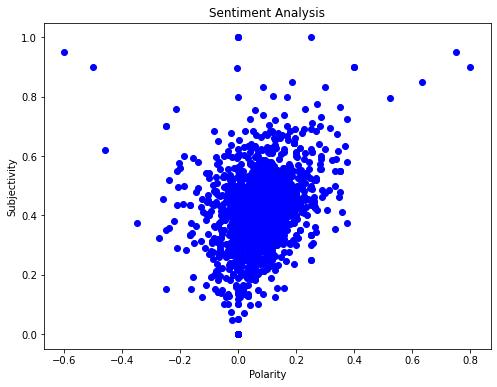

In [31]:
# plot the polarity and subjective
plt.figure(figsize = (8,6))
for i in range(0, df_text.shape[0]):
    plt.scatter(df_text['Polarity'][i], df_text['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Polarity', ylabel='Density'>

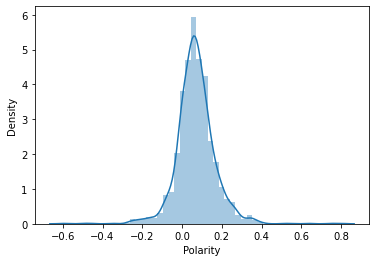

In [32]:
sns.distplot(df_text['Polarity'])

In [33]:
# Get the percentage of positive 
posCase = df_text[df_text.Analysis == 'Positive']
posCase = posCase['Case_Text']

round((posCase.shape[0] / df_text.shape[0]),3)

0.806

In [38]:
#posCase

In [39]:
# Get the percentage of positive 
negCase = df_text[df_text.Analysis == 'Negative']
negCase = negCase['Case_Text']

round((negCase.shape[0] / df_text.shape[0]),2)

0.16

In [40]:
# Plot the value counts

df_text['Analysis'].value_counts()

Positive    1443
Negative     286
Neutral       61
Name: Analysis, dtype: int64

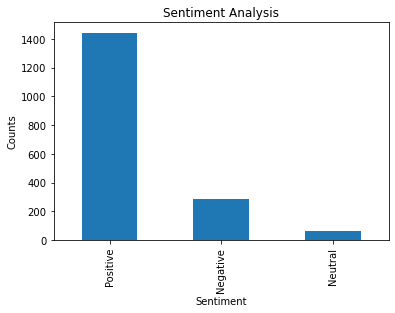

In [41]:
# plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_text['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

### Use another library nltk vader to compare results

In [42]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/angela/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
sentiment = SentimentIntensityAnalyzer()
# Create a function to get the polarity
def vaderPolarity(text):
    return sentiment.polarity_scores(text)

In [44]:
df_vader = df_text
df_vader['VaderPolarity'] = df_vader['Case_Text'].apply(vaderPolarity)
df_vader

,Case_Text,Subjectivity,Polarity,Analysis,VaderPolarity
0,before the deed of grant was made the kamu mad...,0.537563,0.016873,Positive,"{'neg': 0.037, 'neu': 0.88, 'pos': 0.083, 'com..."
1,section of the act provides that any disposit...,0.377646,0.017593,Positive,"{'neg': 0.108, 'neu': 0.852, 'pos': 0.04, 'com..."
2,on august cgu sought orders in the supreme c...,0.711250,0.254375,Positive,"{'neg': 0.027, 'neu': 0.82, 'pos': 0.153, 'com..."
3,thirdly the appellant complained that the trib...,0.416718,-0.028830,Negative,"{'neg': 0.136, 'neu': 0.837, 'pos': 0.027, 'co..."
4,the defendants submit that if a measure of val...,0.634911,0.057692,Positive,"{'neg': 0.052, 'neu': 0.804, 'pos': 0.143, 'co..."
...,...,...,...,...,...
1785,as isaacs j observed giving the judgment of th...,0.434058,0.047598,Positive,"{'neg': 0.047, 'neu': 0.898, 'pos': 0.055, 'co..."
1786,in amodu tijani v the secretary southern niger...,0.485768,-0.002435,Negative,"{'neg': 0.033, 'neu': 0.909, 'pos': 0.058, 'co..."
1787,in szbel v minister for immigration and multic...,0.505000,0.065000,Positive,"{'neg': 0.035, 'neu': 0.918, 'pos': 0.046, 'co..."
1788,both mchugh j and finkelstein j recognised tha...,0.608182,0.148636,Positive,"{'neg': 0.074, 'neu': 0.83, 'pos': 0.096, 'com..."


In [45]:
df_vader['VaderPolarity']

0       {'neg': 0.037, 'neu': 0.88, 'pos': 0.083, 'com...
1       {'neg': 0.108, 'neu': 0.852, 'pos': 0.04, 'com...
2       {'neg': 0.027, 'neu': 0.82, 'pos': 0.153, 'com...
3       {'neg': 0.136, 'neu': 0.837, 'pos': 0.027, 'co...
4       {'neg': 0.052, 'neu': 0.804, 'pos': 0.143, 'co...
                              ...                        
1785    {'neg': 0.047, 'neu': 0.898, 'pos': 0.055, 'co...
1786    {'neg': 0.033, 'neu': 0.909, 'pos': 0.058, 'co...
1787    {'neg': 0.035, 'neu': 0.918, 'pos': 0.046, 'co...
1788    {'neg': 0.074, 'neu': 0.83, 'pos': 0.096, 'com...
1789    {'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...
Name: VaderPolarity, Length: 1790, dtype: object

# 9. The client is interested in seeing how machine learning could potentially help them predict the frequency of cases in the future. The client has asked you to demonstrate how machine learning can be utilized if they were to provide more data.

In [46]:
df['Case_Year'].loc[df['Case_Year'] == 'N/A']

208     N/A
413     N/A
1427    N/A
Name: Case_Year, dtype: object

In [47]:
df_filtered = df.drop([df.index[208], df.index[413], df.index[1427]])
### covert all value of 'Case_Year' to numeric
df_filtered['Case_Year'] = pd.to_numeric(df_filtered['Case_Year'])
### remove any entries where Case_Year is 1969 or earlier.
df_filtered = df_filtered[df_filtered['Case_Year'] > 1969]
df_filtered = df_filtered.reset_index(drop=True)
df_filtered 

,File,Case,Case_Text,Case_Year,Case_Reference
0,06_1130.xml,Tapgnuk v Northern Land Council (1996) 5 NTLR 109,"Before the Deed of Grant was made, the Kamu ma...",1996,They did so because the NLC is required by s 2...
1,06_1630.xml,Silbermann v CGU Insurance Ltd (2003) 47 ACSR 21,"On 27 August 2003, CGU sought orders in the Su...",2003,That application was dismissed by Bergin J on ...
2,08_1893.xml,Minister for Immigration and Multicultural Aff...,"Thirdly, the appellant complained that the Tri...",2000,"In any event, the argument could not be accept..."
3,06_1535.xml,"SZCVC v Minister for Immigration, Multicultura...",nan,2006,
4,07_1433.xml,Gregory v Federal Commissioner of Taxation [19...,"The defendants submit that ""if a measure of va...",1971,The cases say that value is to be determined b...
...,...,...,...,...,...
1667,08_1640.xml,Biyiksiz v Minister for Immigration and Multic...,"Contrary to Telstra's submission, the authorit...",1998,"Contrary to Telstra's submission, the authorit..."
1668,07_879.xml,Australian and International Pilots Associatio...,On 6 November 2006 I ordered that the applican...,2006,
1669,07_1091.xml,Commissioner for Australian Capital Territory ...,In SZBEL v Minister for Immigration and Multic...,1994,In SZBEL v Minister for Immigration and Multic...
1670,06_1308.xml,Australian Securities and Investments Commissi...,Both McHugh J and Finkelstein J recognised tha...,2006,


In [48]:
dataset = df_filtered.groupby(df_filtered['Case_Year'],as_index=False).agg('count')
dataset = dataset.drop(['Case', 'Case_Text','Case_Reference'], axis=1)
dataset = dataset.rename(columns= {"File": "Count"})
dataset.head(5)

,Case_Year,Count
0,1970,1
1,1971,5
2,1972,6
3,1973,5
4,1974,1


In [49]:
### Parse to dataetime type
dataset['Case_Year'] = pd.to_datetime(dataset['Case_Year'], format = '%Y')
indexedDataset = dataset.set_index(['Case_Year'])

In [50]:
from datetime import datetime

In [51]:
indexedDataset

,Count
Case_Year,
1970-01-01,1
1971-01-01,5
1972-01-01,6
1973-01-01,5
1974-01-01,1
1975-01-01,8
1976-01-01,2
1977-01-01,10
1978-01-01,5


In [52]:
indexedDataset.head(5)

,Count
Case_Year,
1970-01-01,1
1971-01-01,5
1972-01-01,6
1973-01-01,5
1974-01-01,1


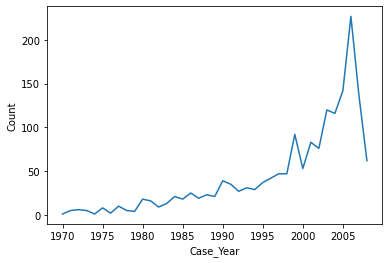

In [53]:
## Plot graph
plt.xlabel('Case_Year')
plt.ylabel('Count')
plt.plot(indexedDataset)

In [54]:
def test_stationarity(timeseries):
    
    # Determing rolling stats
    movingAverage = timeseries.rolling(window=5).mean()
    movingSTD = timeseries.rolling(window = 5).std()
    
    #plot rolling stats
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries['Count'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)  

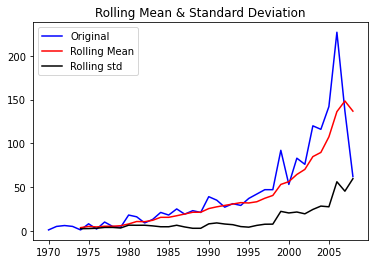

Results of Dickey-Fuller Test: 
Test Statistic                  3.161814
p-value                         1.000000
Lags Used                       6.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


In [59]:
test_stationarity(indexedDataset)
## Mean and std not constant. -- not stationary time series
### P-value too high, >0.05, cannot reject null hypothesis, data is not stationary

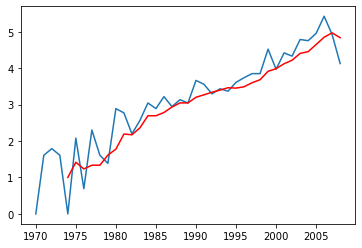

In [60]:
# Estimating Trend, apply log transformation
indexedDataset_logScale = np.log(indexedDataset)

movingAverage = indexedDataset_logScale.rolling(window=5).mean()
movingSTD = indexedDataset_logScale.rolling(window=5).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')
# Still not stationary

In [61]:
logMinusMA = indexedDataset_logScale - movingAverage
# Remove Nan
logMinusMA.dropna(inplace = True)
logMinusMA.head(5)

,Count
Case_Year,
1974-01-01,-1.002127
1975-01-01,0.661426
1976-01-01,-0.541610
1977-01-01,0.965663
1978-01-01,0.272516


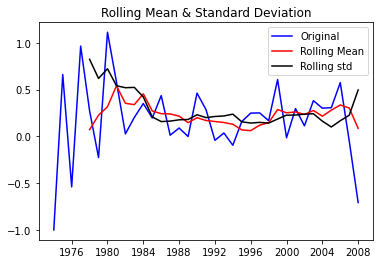

Results of Dickey-Fuller Test: 
Test Statistic                -8.283714e+00
p-value                        4.448551e-13
Lags Used                      0.000000e+00
Number of Observations Used    3.400000e+01
Critical Value (1%)           -3.639224e+00
Critical Value (5%)           -2.951230e+00
Critical Value (10%)          -2.614447e+00
dtype: float64


In [62]:
test_stationarity(logMinusMA)

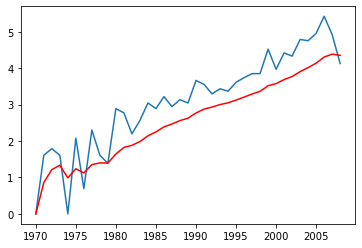

In [63]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife = 5, min_periods=0, adjust = True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

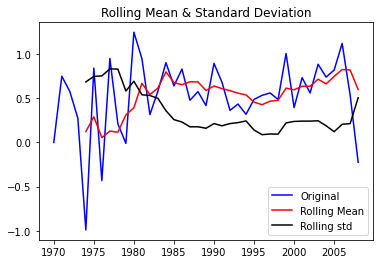

Results of Dickey-Fuller Test: 
Test Statistic                 -3.672573
p-value                         0.004516
Lags Used                       1.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [64]:
logMinusExpDecayAve = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(logMinusExpDecayAve)

In [65]:
# Stationary too

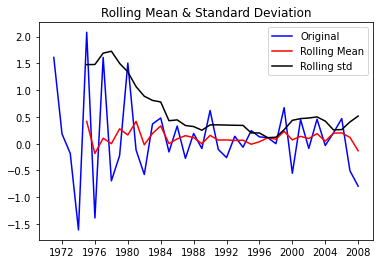

Results of Dickey-Fuller Test: 
Test Statistic                -6.675771e+00
p-value                        4.469352e-09
Lags Used                      2.000000e+00
Number of Observations Used    3.500000e+01
Critical Value (1%)           -3.632743e+00
Critical Value (5%)           -2.948510e+00
Critical Value (10%)          -2.613017e+00
dtype: float64


In [66]:
logDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
logDiffShifting.dropna(inplace = True)
test_stationarity(logDiffShifting)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label = 'Origin')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
#test_stationarity(decomposedLogData)

In [67]:
from statsmodels.tsa.stattools import acf,pacf

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


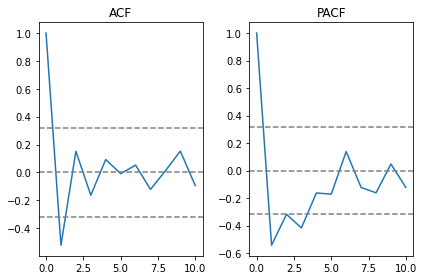

In [68]:
# ACF and PACF

lag_acf = acf(logDiffShifting, nlags = 10)
lag_pacf = pacf(logDiffShifting, nlags = 10, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(logDiffShifting)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(logDiffShifting)), linestyle = '--', color = 'grey')
plt.title('ACF')

# plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'grey')
plt.axhline(y=-1.96/np.sqrt(len(logDiffShifting)), linestyle = '--', color = 'grey')
plt.axhline(y=1.96/np.sqrt(len(logDiffShifting)), linestyle = '--', color = 'grey')
plt.title('PACF')
plt.tight_layout()

In [69]:
# The residual sum of squares (RSS) measures the level of variance in the error term, or residuals, 
#of a regression model. The smaller the residual sum of squares, the better your model fits your data; 
#the greater the residual sum of squares, the poorer your model fits your data.


Plotting AR model


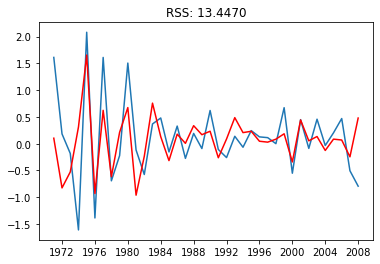

In [70]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# AR model
model = ARIMA(indexedDataset_logScale, order = (2,1,0))
results_ar = model.fit(disp=-1)
plt.plot(logDiffShifting)
plt.plot(results_ar.fittedvalues,color='red')

plt.title('RSS: %.4f'% sum((results_ar.fittedvalues - logDiffShifting['Count'])**2))
print('Plotting AR model')

## (3,1,2) has rss 11.3975, also good

Plotting MA model


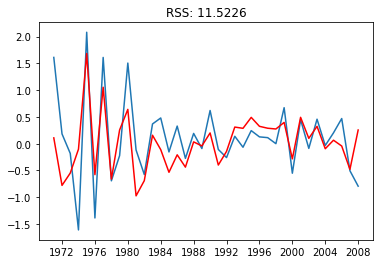

In [71]:
# MA model
model = ARIMA(indexedDataset_logScale, order = (0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(logDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - logDiffShifting['Count'])**2))
print('Plotting MA model')

Plotting ARIMA model


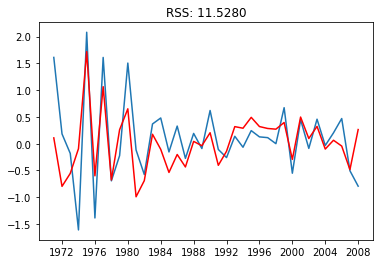

In [72]:
# ARIMA model
model = ARIMA(indexedDataset_logScale, order = (2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(logDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - logDiffShifting['Count'])**2))
print('Plotting ARIMA model')

In [73]:
pred_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
print(pred_ARIMA_diff_cumsum.head(5))

Case_Year
1971-01-01    0.107872
1972-01-01   -0.688832
1973-01-01   -1.243534
1974-01-01   -1.336820
1975-01-01    0.381237
dtype: float64


In [74]:
prediction_ARIMA_log = pd.Series(indexedDataset_logScale['Count'].iloc[0], index = indexedDataset_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(pred_ARIMA_diff_cumsum, fill_value = 0)
prediction_ARIMA_log.head()

Case_Year
1970-01-01    0.000000
1971-01-01    0.107872
1972-01-01   -0.688832
1973-01-01   -1.243534
1974-01-01   -1.336820
dtype: float64

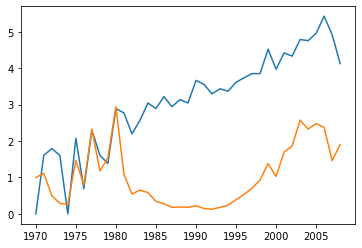

In [75]:
predictions_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset_logScale)
plt.plot(predictions_ARIMA)

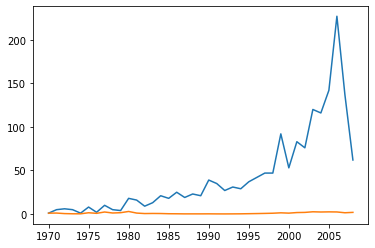

In [76]:
predictions_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

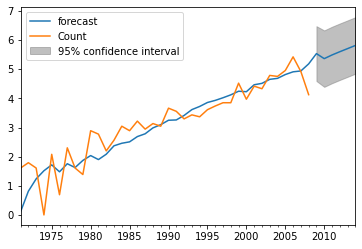

In [77]:
results_ARIMA.plot_predict(1,44)
pred_next5years = results_ARIMA.forecast(steps = 5)

In [78]:
pred = np.exp(pred_next5years[0])
prediction = pd.DataFrame(pred, columns = ['Cases Predictions for Next 5 years'])
prediction['Year'] = pd.Series(['2009','2010','2011','2012','2013'], index=prediction.index)
prediction.set_index('Year',inplace=True)
prediction

,Cases Predictions for Next 5 years
Year,
2009,253.723061
2010,213.476094
2011,242.137901
2012,270.695169
2013,301.202681


In [79]:
pred_interval = np.exp(pred_next5years[2])
prediction['Interval'] = pred_interval.tolist()
prediction

,Cases Predictions for Next 5 years,Interval
Year,,
2009,253.723061,"[99.0672141380054, 649.8153010964767]"
2010,213.476094,"[81.06162771252012, 562.1900760163815]"
2011,242.137901,"[91.92972297737923, 637.7780882245387]"
2012,270.695169,"[102.7714248912355, 712.9985273717157]"
2013,301.202681,"[114.35378307831952, 793.3542058349602]"
